In [83]:
#? Importamos la librerias correspondientes para realizar el CNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt

In [84]:
#? Cargamos dataset CIFAR-10
(x_train, y_train ), (x_test, y_test) = keras.datasets.cifar10.load_data()
#? Imprimimos cuantos datos hay y como estos estan estructurados en el dataset
print(f"forma de x_train: {x_train.shape}") 
print(f"forma de y_train: {y_train.shape}")  
print(f"forma de x_test: {x_test.shape}")   
print(f"forma de y_test: {y_test.shape}")   

forma de x_train: (50000, 32, 32, 3)
forma de y_train: (50000, 1)
forma de x_test: (10000, 32, 32, 3)
forma de y_test: (10000, 1)


In [85]:
# Normalizar los valores de los píxeles entre 0 y 1 
# Si no normalizamos nos aparecera un error 

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


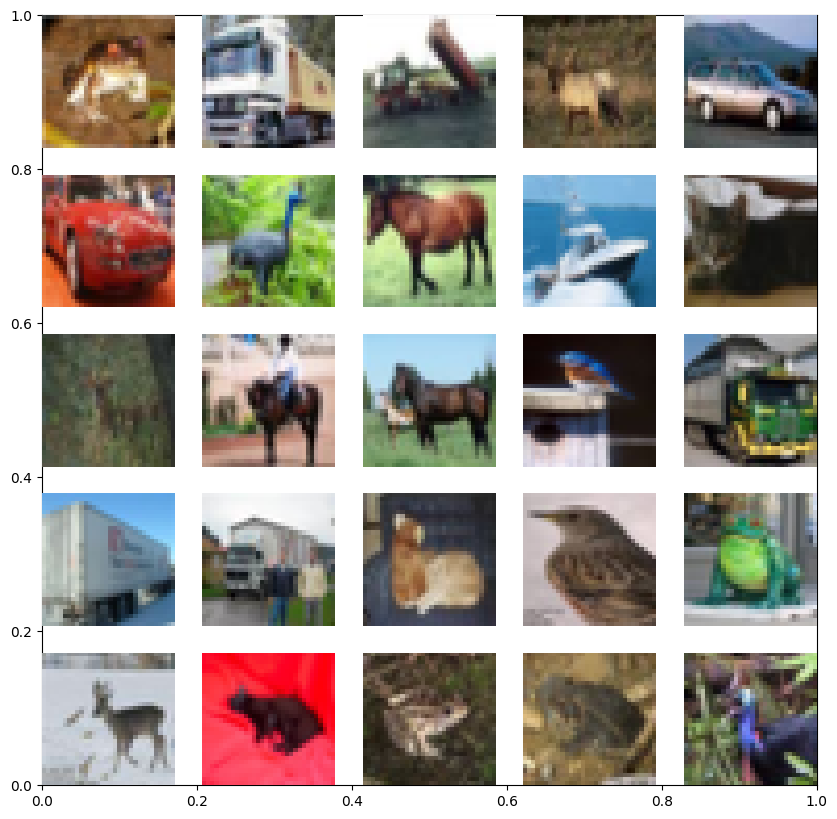

In [86]:
#? Visualizacion de imagenes
class_names = ["Avion", "Automovil", "Pajaro", "Gato", 
            "Venado", "Perro", "Rana", 
            "Caballo", "Barco", "Camion"]
#? En este apartado haremos un visualizacion de 
#? algunas imagenes que encontramos en el dataset
fig, axes = plt.subplots(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.axis("Off")
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
    
plt.show()

In [87]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
# Compilamos el modelo con el optimizado adam y asi mismo categorical_crossentropy 
# por recomendacion del ejercicio 
model.compile(optimizer="adam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])


In [ ]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)

history = model.fit(x_train, y_train_one_hot, 
                    epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2464 - loss: 1.9986 - val_accuracy: 0.4780 - val_loss: 1.4588
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4518 - loss: 1.5116 - val_accuracy: 0.5245 - val_loss: 1.3236
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5222 - loss: 1.3358 - val_accuracy: 0.5769 - val_loss: 1.1943
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5545 - loss: 1.2480 - val_accuracy: 0.6053 - val_loss: 1.1116
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5834 - loss: 1.1736 - val_accuracy: 0.6051 - val_loss: 1.0951
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6113 - loss: 1.1028 - val_accuracy: 0.6303 - val_loss: 1.0354
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6260 - loss: 1.0718 - val_accuracy: 0.6429 - val_loss: 1.0087
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6433 - loss: 1.0206 - val_accuracy: 0

In [ ]:
# Se convierte Y_test a one shot encoding
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print(f"La presicion del modelo es : {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7079 - loss: 0.9899
La presicion del modelo es : 0.7087


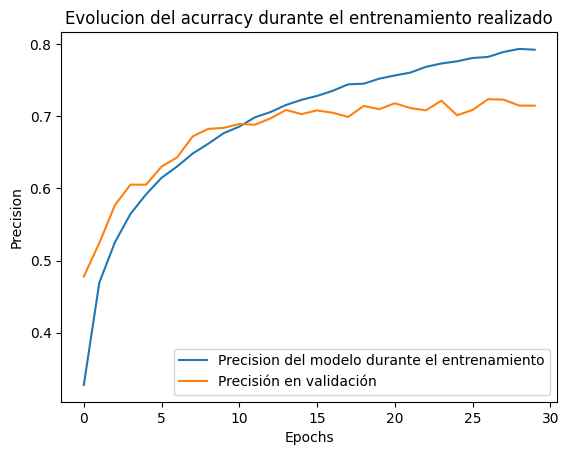

In [92]:
#? Grafica de evolucion de la presicion tanto como de perdida
plt.plot(history.history['accuracy'], 
        label="Precision del modelo durante el entrenamiento")
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Evolucion del acurracy durante el entrenamiento realizado')
plt.legend()
plt.show()

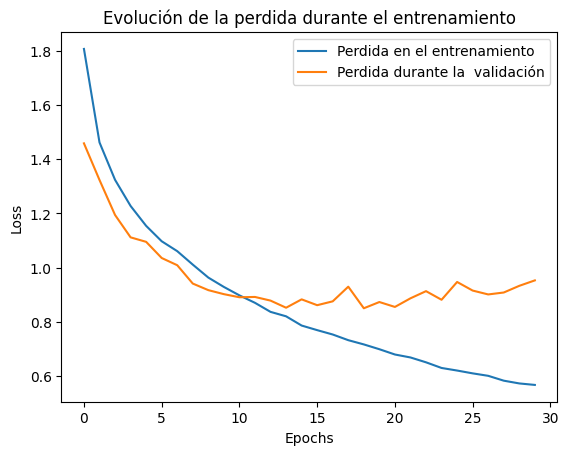

In [93]:
# Aqui se grafica la perdida durante el entrenamiento
plt.plot(history.history['loss'], label='Perdida en el entrenamiento')
plt.plot(history.history['val_loss'], label='Perdida durante la  validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Evolución de la perdida durante el entrenamiento')
plt.legend()
plt.show()